In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import time
import importlib
import logging

importlib.reload(logging)
logging.basicConfig(level = logging.INFO)

import pyhf

logging.info("pyhf version: {}".format(pyhf.__version__))


#Plot's Making  Packages
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
from matplotlib import cm


%config InlineBackend. figure_format = 'retina'

INFO:root:pyhf version: 0.6.3


In [2]:
# yukawatype = 4
# scan_results = pd.read_csv("./scan_results_type_"+str(yukawatype)+"_10000_m12s_cba_origin.csv")
# scan_results_ = pd.read_csv("./scan_results_type_"+str(yukawatype)+"_10000_m12s_cba_current_constraints.csv")
# new_features = ['BRHhh', 'BRhbb', 'cba', 'm12s', 'tb', 'HB_full', 'HB_h', 'HB_H', 'HB_A', 'HB_Hc', 'HS_total', 'HS_rate', 'HS_mass', 'HS_NO', 'tree_level', 'perturbativity', 'stability' ]
# new_results = pd.DataFrame()
# new_results["Xection_fb"] = scan_results["Xection_fb"]
# new_results[new_features] = scan_results_[new_features]
# new_results.to_csv("./scan_results_type_"+str(yukawatype)+"_10000_m12s_cba.csv", index =False)

# Fitting Procedure

* Heavy–quark Yukawa couplings to the light (heavy) CP–even Higgs bosons for type II 2HDM.

Correction            |           Type II             | 
----------------------|:-----------------------------:|
1+ $\Delta^{h^0}_t$   | $\frac{\cos\alpha}{\sin\beta}$  |  
1+ $\Delta^{h^0}_b$   | $-\frac{\sin\alpha}{\cos\beta}$ |  
1+ $\Delta^{H^0}_t$   | $\frac{\sin\alpha}{\sin\beta}$  |  
1+ $\Delta^{H^0}_b$   | $\frac{\cos\alpha}{\cos\beta}$  |  

* Triple Higgs interactions involving the neutral CP–even Higgs fields in the 2HDM.

$$\lambda_{h^0h^0H^0} = \frac{\cos(\beta-\alpha)}{\sin2\beta}\left[\sin2\alpha(2m^2_{h^0}+m^2_{H^0})-\frac{2M_{12}^2}{\sin2\beta}(3\sin2\alpha-\sin2\beta) \right]$$

* The cross section is propotional to amplitude square: 

$$\sigma \propto|\mathcal{A}(pp\to H \to hh \to b\bar{b}b\bar{b})|^2 \propto $$

$$\left|\left[ (1+ \Delta^{H^0}_t)\times\lambda_{h^0h^0H^0}\times(1+ \Delta^{h^0}_b)^2 \right] + \left[(1+ \Delta^{H^0}_b)\times\lambda_{h^0h^0H^0}\times(1+ \Delta^{h^0}_b)^2\right] \right|^2 =$$

$$\left| \left[ (1+ \Delta^{H^0}_t)+(1+ \Delta^{H^0}_b)\right]\times\lambda_{h^0h^0H^0}\times(1+ \Delta^{h^0}_b)^2  \right|^2$$

* The relation between upper limit for number of signal and  number of survival Monte Carlo signal samples at benchmark point can be written in

$$\frac{N^{sig}_{\text{limit}}}{N^{sig}_{\text{MC}}}= \frac{|\mathcal{A}(pp\to H \to hh \to b\bar{b}b\bar{b})|^2(\cos(\beta-\alpha),M_{12}^2)}{|\mathcal{A}(pp\to H \to hh \to b\bar{b}b\bar{b})|^2_{\tan\beta=5,M_{12}^2=400000,\cos(\beta-\alpha)=0.08}}$$


* Our benchmark point is at $\tan\beta$=5, $M_{12}^2$=400000$\text{GeV}^2$, $\cos(\beta-\alpha)$=0.08, $M_H=M_A=M_{H^{\pm}}$=1000GeV, $M_h$=125GeV. 
> At this benchmark point, we the $H\to h h $ is dominant decay mode. ($Br(H\to h h)\approx $0.85)


* $N^{sig}_{\text{limit}}$ is the function of $\cos(\beta-\alpha)$ and $M_{12}^2$.

$$N^{sig}_{\text{limit}}= \frac{|\mathcal{A}(pp\to H \to hh \to b\bar{b}b\bar{b})|^2(\cos(\beta-\alpha),M_{12}^2)}{|\mathcal{A}(pp\to H \to hh \to b\bar{b}b\bar{b})|^2_{\tan\theta=5,M_{12}^2=400000,\cos(\beta-\alpha)=0.08}}\times N^{sig}_{\text{MC}}$$

* $N^{sig}_{\text{MC}}$, $N^{bkg}_{\text{MC}}$ can be obtained after we apply ML classifier.


* Treat $N^{sig}_{\text{MC}}$, $N^{bkg}_{\text{MC}}$ as 1 bin case and use CLs method to get expected signal strengths in $2\sigma$ and $1\sigma$ bands at 95%C.L.

* Translate expected signal strengths to be number of signal events in $2\sigma$ and $1\sigma$ bands at 95%C.L.
$$1\sigma\,\, \text{band} = [s_{-1\sigma}\times N^{sig}_{\text{MC}},s_{1\sigma}\times N^{sig}_{\text{MC}}]$$
$$2\sigma\,\, \text{band} = [s_{-2\sigma}\times N^{sig}_{\text{MC}},s_{2\sigma}\times N^{sig}_{\text{MC}}]$$

* After scan $\cos(\beta-\alpha)$ and $M_{12}^2$, we can pick allowed sets which let $N^{sig}_{\text{limit}}$ in the $1\sigma\,\, \text{band}$ or $2\sigma\,\, \text{band}$ regions.


Ref: [Higgs pair production via gluon fusion in the Two-Higgs-Doublet Model](https://arxiv.org/abs/1407.0281)  
Ref: [Exploring sizable triple Higgs couplings in the 2HDM](https://arxiv.org/abs/2005.10576)  
Ref: [LHC Search of New Higgs Boson via Resonant Di-Higgs Production with Decays into 4W](https://arxiv.org/abs/1706.05980)

## Couplings in 2HDM Type II

In [3]:
# """
# Convention:
# 0 ≤ \beta - \alpha ≤ 𝜋


# 0 < \beta <  𝜋/2
# """


# """
# lambda_Hhh(cb_a, m12s, tb, mH, mh=125 )
# """

# def lambda_Hhh(cb_a, m12s, tb, mH, mh=125 ):
#     b_a = np.arccos(cb_a)
#     b = np.arctan(tb)
#     a = np.arctan(tb) - np.arccos(cb_a)
    
#     ########################################################################
#     """
#     arXiv:2005.10576v2 Eq. (32)
#     """
    
#     part_a = (2*mh**2+mH**2-4*(m12s/(np.sin(b)*np.cos(b))))*np.sin(b_a)**2
#     part_b = 2*1/np.tan(2*b)*(2*mh**2+mH**2-3*(m12s/(np.sin(b)*np.cos(b))))*np.sin(b_a)*cb_a
#     part_c = (2*mh**2+mH**2-2*(m12s/(np.sin(b)*np.cos(b))))*cb_a**2

#     return -1*cb_a/246*(part_a+part_b-part_c)
#     ########################################################################
    
    
# """
# ghU(cb_a, tb, type)
# """
# def ghU(cb_a, tb, type):
#     b_a = np.arccos(cb_a)
#     b = np.arctan(tb)
#     a = np.arctan(tb) - np.arccos(cb_a)
    
#     if type not in [1,2,3,4]:
#         raise ValueError("Please let 'type' in [1,2,3,4]")
#     else:
#         return np.cos(a)/np.sin(b)

    
# """
# ghD(cb_a, tb, type)
# """
# def ghD(cb_a, tb, type):
#     b_a = np.arccos(cb_a)
#     b = np.arctan(tb)
#     a = np.arctan(tb) - np.arccos(cb_a)

#     if type not in [1,2,3,4]:
#         raise ValueError("Please let 'type' in [1,2,3,4]")
#     elif type == 1:
#         return np.cos(a)/np.sin(b)  
#     elif type == 2:
#         return -1*np.sin(a)/np.cos(b)  
#     elif type == 3:
#         return np.cos(a)/np.sin(b) 
#     elif type == 4:
#         return -1*np.sin(a)/np.cos(b)   


# """
# ghL(cb_a, tb, type)
# """
# def ghL(cb_a, tb, type):
#     b_a = np.arccos(cb_a)
#     b = np.arctan(tb)
#     a = np.arctan(tb) - np.arccos(cb_a)
    
#     if type not in [1,2,3,4]:
#         raise ValueError("Please let 'type' in [1,2,3,4]")
#     elif type == 1:
#         return np.cos(a)/np.sin(b)  
#     elif type == 2:
#         return -1*np.sin(a)/np.cos(b)  
#     elif type == 3:
#         return -1*np.sin(a)/np.cos(b)
#     elif type == 4:
#         return np.cos(a)/np.sin(b)  



# """
# gHU(cb_a, tb, type)
# """
# def gHU(cb_a, tb, type):
#     b_a = np.arccos(cb_a)
#     b = np.arctan(tb)
#     a = np.arctan(tb) - np.arccos(cb_a)

#     if type not in [1,2,3,4]:
#         raise ValueError("Please let 'type' in [1,2,3,4]")
#     else:
#         return np.sin(a)/np.sin(b)

    
# """
# gHD(cb_a, tb, type)
# """
# def gHD(cb_a, tb, type):
#     b_a = np.arccos(cb_a)
#     b = np.arctan(tb)
#     a = np.arctan(tb) - np.arccos(cb_a)
    
#     if type not in [1,2,3,4]:
#         raise ValueError("Please let 'type' in [1,2,3,4]")
#     elif type == 1:
#         return np.sin(a)/np.sin(b)  
#     elif type == 2:
#         return np.cos(a)/np.cos(b)  
#     elif type == 3:
#         return np.sin(a)/np.sin(b)
#     elif type == 4:
#         return np.cos(a)/np.cos(b) 
    
# """
# gHL(cb_a, tb, type)
# """
# def gHL(cb_a, tb, type):
#     b_a = np.arccos(cb_a)
#     b = np.arctan(tb)
#     a = np.arctan(tb) - np.arccos(cb_a)
    
#     if type not in [1,2,3,4]:
#         raise ValueError("Please let 'type' in [1,2,3,4]")
#     elif type == 1:
#         return np.sin(a)/np.sin(b)  
#     elif type == 2:
#         return np.cos(a)/np.cos(b)  
#     elif type == 3:
#         return np.cos(a)/np.cos(b)
#     elif type == 4:
#         return np.sin(a)/np.sin(b) 

# """
# gAU(cb_a, tb, type)
# """
# def gAU(cb_a, tb, type):
#     b_a = np.arccos(cb_a)
#     b = np.arctan(tb)
#     a = np.arctan(tb) - np.arccos(cb_a)

#     if type not in [1,2,3,4]:
#         raise ValueError("Please let 'type' in [1,2,3,4]")
#     else:
#         return np.cos(b)/np.sin(b)

    
# """
# gAD(cb_a, tb, type)
# """
# def gAD(cb_a, tb, type):
#     b_a = np.arccos(cb_a)
#     b = np.arctan(tb)
#     a = np.arctan(tb) - np.arccos(cb_a)
    
#     if type not in [1,2,3,4]:
#         raise ValueError("Please let 'type' in [1,2,3,4]")
#     elif type == 1:
#         return -np.cos(b)/np.sin(b)
#     elif type == 2:
#         return tb
#     elif type == 3:
#         return -np.cos(b)/np.sin(b)
#     elif type == 4:
#         return tb
    
# """
# gAL(cb_a, tb, type)
# """
# def gAL(cb_a, tb, type):
#     b_a = np.arccos(cb_a)
#     b = np.arctan(tb)
#     a = np.arctan(tb) - np.arccos(cb_a)
    
#     if type not in [1,2,3,4]:
#         raise ValueError("Please let 'type' in [1,2,3,4]")
#     elif type == 1:
#         return -np.cos(b)/np.sin(b)
#     elif type == 2:
#         return tb
#     elif type == 3:
#         return tb
#     elif type == 4:
#         return -np.cos(b)/np.sin(b)



# """
# gU(tb, type)
# """
# def gU(tb, type):

#     Mu, Mc, Mt = 0.0, 0.0, 173.07
#     Md, Ms, Mb = 0.0, 0.0, 4.78
#     Me, Mmu, mta = 5.10998918e-04, 1.05658367e-01, 1.77684000e+00
#     vev = 246

#     b = np.arctan(tb)
    
#     if type not in [1,2,3,4]:
#         raise ValueError("Please let 'type' in [1,2,3,4]")
#     else:
#         return np.array([Mu, Mc, Mt])*np.sqrt(2)/vev*(np.cos(b)/np.sin(b))*(-1)

# """
# gD(tb, type)
# """
# def gD(tb, type):

#     Mu, Mc, Mt = 0.0, 0.0, 173.07
#     Md, Ms, Mb = 0.0, 0.0, 4.78
#     Me, Mmu, mta = 5.10998918e-04, 1.05658367e-01, 1.77684000e+00
#     vev = 246

#     b = np.arctan(tb)
    
#     if type not in [1,2,3,4]:
#         raise ValueError("Please let 'type' in [1,2,3,4]")
#     elif type == 1:
#         return np.array([Md, Ms, Mb])*np.sqrt(2)/vev*(np.cos(b)/np.sin(b))*(-1)
#     elif type == 2:
#         return -np.array([Md, Ms, Mb])*np.sqrt(2)/vev*tb*(-1)
#     elif type == 3:
#         return -np.array([Md, Ms, Mb])*np.sqrt(2)/vev*tb*(-1)
#     elif type == 4:
#         return np.array([Md, Ms, Mb])*np.sqrt(2)/vev*(np.cos(b)/np.sin(b))*(-1)

# """
# gL(tb, type)
# """
# def gL(tb, type):

#     Mu, Mc, Mt = 0.0, 0.0, 173.07
#     Md, Ms, Mb = 0.0, 0.0, 4.78
#     Me, Mmu, mta = 5.10998918e-04, 1.05658367e-01, 1.77684000e+00
#     vev = 246

#     b = np.arctan(tb)
    
#     if type not in [1,2,3,4]:
#         raise ValueError("Please let 'type' in [1,2,3,4]")
#     elif type == 1:
#         return np.array([Me, Mmu, mta])*np.sqrt(2)/vev*(np.cos(b)/np.sin(b))*(-1)
#     elif type == 2:
#         return -np.array([Me, Mmu, mta ])*np.sqrt(2)/vev*tb*(-1)
#     elif type == 3:
#         return np.array([Me, Mmu, mta ])*np.sqrt(2)/vev*(np.cos(b)/np.sin(b))*(-1)
#     elif type == 4:
#         return -np.array([Me, Mmu, mta ])*np.sqrt(2)/vev*tb*(-1)


    
# """
# Constraint(cb_a, m12s, tb, mH, mh=125, luminosity = 3000, acceptance = 0.5, Xection = 0.01)

# luminosity (fb^-1)
# Xection (pd)

# m_h:    125.00000
# m_H:   1000.00000
# m_A:   1001.00000
# m_H+:   1001.00000
# sin(b-a):      0.99612
# lambda_6:      0.00000
# lambda_7:      0.00000
# m12^2: 400000.00000
# tan(beta):      5.00000  (fix)


# np.arctan(5) - 𝜋  ≤ \alpha ≤  np.arctan(5)

# """    
    
# def Constraint_N(cb_a, m12s, tb, mH, mh=125, type=2, luminosity = 3000, acceptance = 0.5, Xection = 0.01):
    
#     N_MC = luminosity*acceptance*(Xection*1000)
    
#     numerator = ((1+gHU(cb_a, tb, type)) + (1+gHD(cb_a, tb, type)))**2 * (lambda_Hhh(cb_a, m12s, tb, mH, mh=125 )**2) * (1+ghD(cb_a, tb, type))**4
    
#     cba = np.cos(np.arcsin(0.99612))
#     denominator =  ((1+gHU(cba, 5, type)) + (1+gHD(cba, 5, type)))**2 * (lambda_Hhh(cba, 400000, 5, 1000, mh=125 )**2) * (1+ghD(cba, 5, type))**4
    
#     return N_MC*(numerator/denominator) #




# """
# Statistics
# """

# def chi_square(n_s, n_b):
    
#     #[(s+b - b) / sqrt(b)]^2
    
#     chisquare = (n_s)**2/n_b
    
#     return chisquare

# def tmu_pyhf(n_sig, n_bkg):

#     model = pyhf.simplemodels.hepdata_like(
#         signal_data=[n_sig], bkg_data=[n_bkg], bkg_uncerts=[np.sqrt(n_bkg)]

#     )

#     test_mu = 1.0
#     init_pars = model.config.suggested_init()
#     par_bounds = model.config.suggested_bounds()
#     par_bounds[model.config.poi_index] = [-10.0, 10.0]
#     fixed_params = model.config.suggested_fixed()
    
#     return pyhf.infer.test_statistics.tmu(test_mu, observations, model, init_pars, par_bounds, fixed_params)


# def qmu_tilde_pyhf(n_sig, n_bkg):

#     model = pyhf.simplemodels.hepdata_like(
#         signal_data=[n_sig], bkg_data=[n_bkg], bkg_uncerts=[np.sqrt(n_bkg)]

#     )

#     test_mu = 1.0
#     init_pars = model.config.suggested_init()
#     par_bounds = model.config.suggested_bounds()
#     fixed_params = model.config.suggested_fixed()
    
#     return pyhf.infer.test_statistics.qmu_tilde(test_mu, observations, model, init_pars, par_bounds, fixed_params)




In [4]:
# %%time
# start = time.time()

# b_tag_eff = 0.77**4

# dictionary = {
#               # "sig_Xection" : (0.9864/1000),  #ppH (pb)  type 1
#               # "sig_Branching_ratio" : 0.88221*0.62102*0.62102, #type 1
#               "sig_Xection" : (0.81186/1000),  #ppH (pb) type 2
#               "sig_Branching_ratio" : 0.8715*0.3560*0.3560, #type 2
#               "sig_acceptance": 0.096102*b_tag_eff,
#               "ttbar_bkg_Xection" : 260.3554,  # ttbar (pb)
#               "ttbar_bkg_acceptance" : 5.000000e-07*b_tag_eff*0.192,
#               "QCD_bkg_Xection" : 11087.8358304,  # ppjjjj (pb)
#               "QCD_bkg_acceptance" : 1.564000e-07*b_tag_eff*0.015,
#               "luminosity": 3000
#               }
    
    
# n_sig = dictionary["sig_Xection"]*dictionary["sig_Branching_ratio"]*dictionary["sig_acceptance"]*dictionary["luminosity"]*1000  
# n_bkg = (dictionary["ttbar_bkg_Xection"]*dictionary["ttbar_bkg_acceptance"] + dictionary["QCD_bkg_Xection"]*dictionary["QCD_bkg_acceptance"])*dictionary["luminosity"]*1000

# logging.info("# of sig survival: {}".format(n_sig))
# logging.info("# of bkg survival: {}".format(n_bkg))
# logging.info("Z= {}".format(n_sig/np.sqrt(n_bkg)))
# time.sleep(1)

# n_slice = 100
# cb_a = np.linspace(-1 , 1,  n_slice)
# m12_s = np.linspace(1E+5, 1E+6,  n_slice)

# """
# numpy vectorize method
# """

# # cba, m12s = np.meshgrid(cb_a, m12_s)
# # tb = np.full((n_slice, n_slice), 5)
# # mH = np.full((n_slice, n_slice), 1000)
# # mh = np.full((n_slice, n_slice), 125)
# # type = np.full((n_slice, n_slice), 1)
# # luminosity = np.full((n_slice, n_slice), dictionary["luminosity"])
# # acceptance = np.full((n_slice, n_slice), dictionary["sig_acceptance"])
# # Xection = np.full((n_slice, n_slice), dictionary["sig_Xection"]*dictionary["sig_Branching_ratio"])

# # constraint_n = np.vectorize(Constraint_N)(cba, m12s, tb, mH, mh, type, luminosity, acceptance, Xection)
# # constraint_n = Constraint_N(cba, m12s, tb, mH, mh, type, luminosity, acceptance, Xection)


# """
# multiprocessing method
# """
# # ref: https://www.maxlist.xyz/2020/03/20/multi-processing-pool/

# cba, m12s = np.meshgrid(cb_a, m12_s)
# tb = np.full((n_slice, n_slice), 5).reshape(n_slice*n_slice,)
# mH = np.full((n_slice, n_slice), 1000).reshape(n_slice*n_slice,)
# mh = np.full((n_slice, n_slice), 125).reshape(n_slice*n_slice,)
# type = np.full((n_slice, n_slice), 2).reshape(n_slice*n_slice,)
# luminosity = np.full((n_slice, n_slice), dictionary["luminosity"]).reshape(n_slice*n_slice,)
# acceptance = np.full((n_slice, n_slice), dictionary["sig_acceptance"]).reshape(n_slice*n_slice,)
# Xection = np.full((n_slice, n_slice), dictionary["sig_Xection"]*dictionary["sig_Branching_ratio"]).reshape(n_slice*n_slice,)

# tmp = []
# for element in zip(cba.reshape(n_slice*n_slice,), m12s.reshape(n_slice*n_slice,), tb, mH, mh, type, luminosity, acceptance, Xection):
#     tmp.append(element)



# from multiprocessing import Process, Pool

# nb_threads = 40

# if __name__ == '__main__':

#     pool = Pool(nb_threads)

#     pool_outputs = pool.starmap_async(Constraint_N, tmp)
#     # print('將不會阻塞並和 pool.map_async 並行觸發')

#     # close 和 join 是確保主程序結束後，子程序仍然繼續進行
#     pool.close()
#     pool.join()


# constraint_n = np.array(pool_outputs.get()).reshape(n_slice, n_slice)


# finish = time.time()
# logging.info("Total TIme: {} min".format((finish-start)/60))


In [5]:
%%time
def Z(s,b):
    z =np.sqrt(2*((s+b)*np.log(1+s/b)-s))
#     z = s/np.sqrt(b)
    return z

yukawa_type = 2
# parameter_space = "tb_cba" #or m12s_cba
parameter_space = "m12s_cba"


if yukawa_type == 1:
  plot_title = "Type-I"
  xection =  (0.9864/1000) #ppH (pb)  type 1
  total_branching_ratio = 0.88221*0.62102*0.62102 #type 1

elif yukawa_type == 2:
  plot_title = "Type-II"
  xection = (0.81186/1000) #ppH (pb)
  total_branching_ratio = 0.8715*0.3560*0.3560

elif yukawa_type == 3:
  plot_title = "Type-III"
  xection = (0.83234/1000) #ppH (pb)
  total_branching_ratio = 0.87279*0.32968*0.32968

elif yukawa_type == 4:
  plot_title = "Type-IV"
  xection = (0.98173/1000) #ppH (pb)
  total_branching_ratio = 0.88087*0.64835*0.64835

b_tag_eff = 0.77**4
dictionary = {
              "sig_Xection" : xection,  
              "sig_Branching_ratio" : total_branching_ratio, 
              "sig_CUT_acceptance": 0.106051*b_tag_eff,
              "sig_BDT_acceptance": 0.096001*b_tag_eff,
              "sig_CNN_acceptance": 0.096102*b_tag_eff,
              "ttbar_bkg_Xection" : 260.3554,  # ttbar (pb)
              "ttbar_CUT_acceptance" : 0.000002*b_tag_eff*0.192,
              "ttbar_BDT_acceptance" : 5e-07*b_tag_eff*0.192,
              "ttbar_CNN_acceptance" : 4e-07*b_tag_eff*0.192,
              "QCD_bkg_Xection" : 11087.8358304,  # ppjjjj (pb)
              "QCD_CUT_acceptance" : 0.000008*b_tag_eff*0.015,
              "QCD_BDT_acceptance" : 7.819e-07*b_tag_eff*0.015,
              "QCD_CNN_acceptance" : 1.564000e-07*b_tag_eff*0.015,
              "luminosity": 3000
              }
    
    
n_sig_cut = dictionary["sig_Xection"]*dictionary["sig_Branching_ratio"]*dictionary["sig_CUT_acceptance"]*dictionary["luminosity"]*1000  
n_sig_bdt = dictionary["sig_Xection"]*dictionary["sig_Branching_ratio"]*dictionary["sig_BDT_acceptance"]*dictionary["luminosity"]*1000  
n_sig_cnn = dictionary["sig_Xection"]*dictionary["sig_Branching_ratio"]*dictionary["sig_CNN_acceptance"]*dictionary["luminosity"]*1000  
n_bkg_cut = (dictionary["ttbar_bkg_Xection"]*dictionary["ttbar_CUT_acceptance"] + dictionary["QCD_bkg_Xection"]*dictionary["QCD_CUT_acceptance"])*dictionary["luminosity"]*1000
n_bkg_bdt = (dictionary["ttbar_bkg_Xection"]*dictionary["ttbar_BDT_acceptance"] + dictionary["QCD_bkg_Xection"]*dictionary["QCD_BDT_acceptance"])*dictionary["luminosity"]*1000
n_bkg_cnn = (dictionary["ttbar_bkg_Xection"]*dictionary["ttbar_CNN_acceptance"] + dictionary["QCD_bkg_Xection"]*dictionary["QCD_CNN_acceptance"])*dictionary["luminosity"]*1000

logging.info("Cut-base: # of sig survival: {:.3f} # of bkg survival: {:.3f} Z= {:.3f}".format(n_sig_cut, n_bkg_cut, Z(n_sig_cut,n_bkg_cut)))
logging.info("BDT-base: # of sig survival: {:.3f} # of bkg survival: {:.3f} Z= {:.3f}".format(n_sig_bdt, n_bkg_bdt, Z(n_sig_bdt,n_bkg_bdt)))
logging.info("CNN-base: # of sig survival: {:.3f} # of bkg survival: {:.3f} Z= {:.3f}".format(n_sig_cnn, n_bkg_cnn, Z(n_sig_cnn,n_bkg_cnn)))

if parameter_space == "m12s_cba":
  scan_results = pd.read_csv("./scan_results_type_"+str(yukawa_type)+"_10000_m12s_cba.csv")
  scan_results_highresolution = pd.read_csv("./scan_results_type_"+str(yukawa_type)+"_1000000_m12s_cba_current_constraints.csv")
  constraint_n_cut = scan_results["Xection_fb"]*scan_results["BRHhh"]*(scan_results["BRhbb"]**2)*dictionary["luminosity"]*dictionary["sig_CUT_acceptance"]
  constraint_n_bdt = scan_results["Xection_fb"]*scan_results["BRHhh"]*(scan_results["BRhbb"]**2)*dictionary["luminosity"]*dictionary["sig_BDT_acceptance"]
  constraint_n_cnn = scan_results["Xection_fb"]*scan_results["BRHhh"]*(scan_results["BRhbb"]**2)*dictionary["luminosity"]*dictionary["sig_CNN_acceptance"]

  constraint_n_cut = Z(np.array(constraint_n_cut),n_bkg_cut)
  constraint_n_bdt = Z(np.array(constraint_n_bdt),n_bkg_bdt)
  constraint_n_cnn = Z(np.array(constraint_n_cnn),n_bkg_cnn)


  n_slice = int(np.sqrt(len(scan_results)))
  constraint_n_cut = np.nan_to_num(np.array(constraint_n_cut).reshape(n_slice, n_slice))
  constraint_n_bdt = np.nan_to_num(np.array(constraint_n_bdt).reshape(n_slice, n_slice))
  constraint_n_cnn = np.nan_to_num(np.array(constraint_n_cnn).reshape(n_slice, n_slice))

  scan_results_cb_a = np.array(scan_results["cba"]).reshape(n_slice, n_slice)
  scan_results_m12s = np.array(scan_results["m12s"]).reshape(n_slice, n_slice)


  cb_a = np.linspace(-1 , 1,  n_slice)
  m12_s = np.linspace(1E+5, 1E+6,  n_slice)

  cba, m12s = np.meshgrid(cb_a, m12_s)

  """
  Current Constraints 
  """
  current_bounds_features = ['HB_full', 'HB_h', 'HB_H', 'HB_A', 'HB_Hc', 'HS_total', 'HS_rate', 'HS_mass', 'HS_NO','tree_level','perturbativity','stability']
  current_bounds = {"HB_full": 0}
  for element in current_bounds_features:
      current_bounds.update({element:0})

  for i, element in enumerate(current_bounds):
    current_bounds[element] = np.array(scan_results[current_bounds_features[i]]).reshape(n_slice, n_slice)

  """
  Current Constraints High Resolution
  """
  n_slice_highresolution = int(np.sqrt(len(scan_results_highresolution)))
  scan_results_cb_a_highresolution = np.array(scan_results_highresolution["cba"]).reshape(n_slice_highresolution, n_slice_highresolution)
  scan_results_m12s_highresolution = np.array(scan_results_highresolution["m12s"]).reshape(n_slice_highresolution, n_slice_highresolution)
  current_bounds_highresolution = {"HB_full": 0}
  for element in current_bounds_features:
      current_bounds_highresolution.update({element:0})
  for i, element in enumerate(current_bounds_highresolution):
    current_bounds_highresolution[element] = np.array(scan_results_highresolution[current_bounds_features[i]]).reshape(n_slice_highresolution, n_slice_highresolution)

elif parameter_space == "tb_cba":

  scan_results = pd.read_csv("./scan_results_type_"+str(yukawa_type)+"_10000_tb_cba.csv")
  scan_results_highresolution = pd.read_csv("./scan_results_type_"+str(yukawa_type)+"_1000000_tb_cba_current_constraints.csv")
  
  constraint_n_cut = scan_results["Xection_fb"]*scan_results["BRHhh"]*(scan_results["BRhbb"]**2)*dictionary["luminosity"]*dictionary["sig_CUT_acceptance"]
  constraint_n_bdt = scan_results["Xection_fb"]*scan_results["BRHhh"]*(scan_results["BRhbb"]**2)*dictionary["luminosity"]*dictionary["sig_BDT_acceptance"]
  constraint_n_cnn = scan_results["Xection_fb"]*scan_results["BRHhh"]*(scan_results["BRhbb"]**2)*dictionary["luminosity"]*dictionary["sig_CNN_acceptance"]

  constraint_n_cut = Z(np.array(constraint_n_cut),n_bkg_cut)
  constraint_n_bdt = Z(np.array(constraint_n_bdt),n_bkg_bdt)
  constraint_n_cnn = Z(np.array(constraint_n_cnn),n_bkg_cnn)


  n_slice = int(np.sqrt(len(scan_results)))
  constraint_n_cut = np.nan_to_num(np.array(constraint_n_cut).reshape(n_slice, n_slice))
  constraint_n_bdt = np.nan_to_num(np.array(constraint_n_bdt).reshape(n_slice, n_slice))
  constraint_n_cnn = np.nan_to_num(np.array(constraint_n_cnn).reshape(n_slice, n_slice))

  scan_results_cb_a = np.array(scan_results["cba"]).reshape(n_slice, n_slice)
  scan_results_tb = np.array(scan_results["tb"]).reshape(n_slice, n_slice)

  cb_a = np.linspace(-1 , 1,  n_slice)
  t_b = np.linspace(0.5, 50,  n_slice)

  cba, tb = np.meshgrid(cb_a, t_b)

  """
  Current Constraints 
  """
  current_bounds_features = ['HB_full', 'HB_h', 'HB_H', 'HB_A', 'HB_Hc', 'HS_total', 'HS_rate', 'HS_mass', 'HS_NO','tree_level','perturbativity','stability']
  current_bounds = {"HB_full": 0}
  for element in current_bounds_features:
      current_bounds.update({element:0})

  for i, element in enumerate(current_bounds):
    current_bounds[element] = np.array(scan_results[current_bounds_features[i]]).reshape(n_slice, n_slice)

  """
  Current Constraints High Resolution
  """
  n_slice_highresolution = int(np.sqrt(len(scan_results_highresolution)))
  scan_results_cb_a_highresolution = np.array(scan_results_highresolution["cba"]).reshape(n_slice_highresolution, n_slice_highresolution)
  scan_results_tb_highresolution = np.array(scan_results_highresolution["tb"]).reshape(n_slice_highresolution, n_slice_highresolution)
  current_bounds_highresolution = {"HB_full": 0}
  for element in current_bounds_features:
      current_bounds_highresolution.update({element:0})
  for i, element in enumerate(current_bounds_highresolution):
    current_bounds_highresolution[element] = np.array(scan_results_highresolution[current_bounds_features[i]]).reshape(n_slice_highresolution, n_slice_highresolution)




INFO:root:Cut-base: # of sig survival: 10.029 # of bkg survival: 1508.610 Z= 0.258
INFO:root:BDT-base: # of sig survival: 9.078 # of bkg survival: 163.502 Z= 0.704
INFO:root:CNN-base: # of sig survival: 9.088 # of bkg survival: 48.519 Z= 1.267


CPU times: user 2.27 s, sys: 286 ms, total: 2.55 s
Wall time: 2.55 s


<timed exec>:2: RuntimeWarning: invalid value encountered in sqrt


# Pick Allowed Parameter sets

In [7]:
%%time

def allow_region_boundary(constraint_value, sigma):

    constraint_alowed = np.where(constraint_value <= sigma, constraint_value, -1 )
    constraint_alowed_boundary = np.where(constraint_alowed >= 0, 1, constraint_alowed )
    allowed_region = np.where(constraint_alowed != -1)

    return constraint_alowed_boundary, allowed_region

def sensitivity_region_boundary(constraint_value, sigma):

    sensitivity = np.where(constraint_value > sigma, constraint_value, -1 )
    sensitivity_boundary = np.where(sensitivity >= 0, 1, sensitivity )
    sensitivity_region = np.where(sensitivity != -1)

    return sensitivity_boundary, sensitivity_region




constraint_alowed_1_boundary_cut, allowed_region_1_cut = allow_region_boundary(constraint_n_cut, 1)
constraint_alowed_2_boundary_cut, allowed_region_2_cut = allow_region_boundary(constraint_n_cut, 2)

constraint_alowed_1_boundary_bdt, allowed_region_1_bdt = allow_region_boundary(constraint_n_bdt, 1)
constraint_alowed_2_boundary_bdt, allowed_region_2_bdt = allow_region_boundary(constraint_n_bdt, 2)

constraint_alowed_1_boundary_cnn, allowed_region_1_cnn = allow_region_boundary(constraint_n_cnn, 1)
constraint_alowed_2_boundary_cnn, allowed_region_2_cnn = allow_region_boundary(constraint_n_cnn, 2)


logging.info("Cut-base len(allowed_region_1): {:} len(allowed_region_2): {:}".format(len(allowed_region_1_cut[0]), len(allowed_region_2_cut[0])))
logging.info("BDT len(allowed_region_1): {:} len(allowed_region_2): {:}".format(len(allowed_region_1_bdt[0]), len(allowed_region_2_bdt[0])))
logging.info("CNN len(allowed_region_1): {:} len(allowed_region_2): {:}".format(len(allowed_region_1_cnn[0]), len(allowed_region_2_cnn[0])))



INFO:root:Cut-base len(allowed_region_1): 2478 len(allowed_region_2): 3196
INFO:root:BDT len(allowed_region_1): 1728 len(allowed_region_2): 2178
INFO:root:CNN len(allowed_region_1): 1470 len(allowed_region_2): 1792


CPU times: user 8.66 ms, sys: 537 µs, total: 9.2 ms
Wall time: 7.41 ms


<timed exec>:58: UserWarning: linewidths is ignored by contourf
<timed exec>:74: UserWarning: linewidths is ignored by contourf
INFO:matplotlib.mathtext:Substituting symbol L from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol L from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol L from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol L from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol L from STIXGeneral


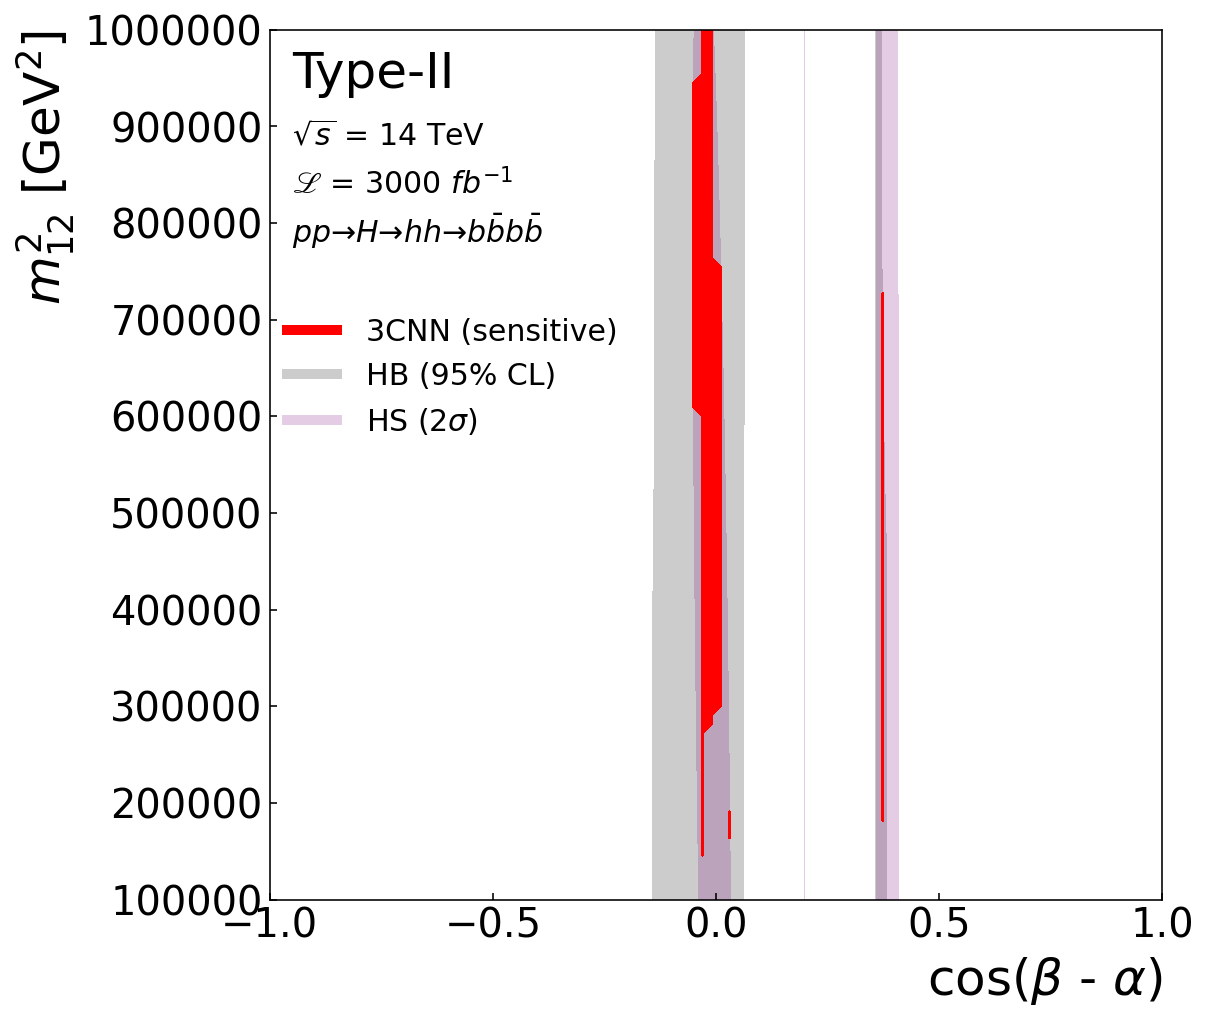

CPU times: user 1.31 s, sys: 690 ms, total: 2 s
Wall time: 2 s


In [9]:
%%time
fig, ax = plt.subplots(1,1, figsize=(8,8))

range_i, range_e = 0, 100

if parameter_space == "m12s_cba":
    yaxis = m12s
    xaxix_highresolution = scan_results_cb_a_highresolution
    yaxis_highresolution = scan_results_m12s_highresolution
    ymin, ymax = 100000, 1000000
    plot_title_position = 940000
    energy_position = 880000
    luminosity_position = 830000
    process_position = 780000
    CL_position = 720000
    ylabel_ = '$m_{12}^2$ [$\mathrm{GeV}^2$]'

elif parameter_space == "tb_cba":
    yaxis = tb
    xaxix_highresolution = scan_results_cb_a_highresolution
    yaxis_highresolution = scan_results_tb_highresolution
    ymin, ymax = 0.5, 50
    plot_title_position = 39
    energy_position = 30
    luminosity_position = 24
    process_position = 20
    CL_position = 32
    ylabel_ = '$tan(\\beta)$'


# Python contour plot
# Ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html
# Ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html
# contour -> line
# contourf -> region


# CS_2_sigma_cut = plt.contourf(cba[:,range_i:range_e], yaxis[:,range_i:range_e], constraint_n_cut[:,range_i:range_e], 
#                             colors='blue', 
#                             linestyles="-", 
#                             linewidths=1,
#                             levels=[0,2],
#                             corner_mask = 0
#                             )

# CS_2_sigma_bdt = plt.contourf(cba[:,range_i:range_e], yaxis[:,range_i:range_e], constraint_n_bdt[:,range_i:range_e], 
#                             colors='green', 
#                             linestyles="-", 
#                             linewidths=2,
#                             levels=[0,2],
#                             corner_mask = 0
#                             )

# CS_2_sigma_cnn = plt.contourf(cba[:,range_i:range_e], yaxis[:,range_i:range_e], constraint_n_cnn[:,range_i:range_e], 
#                             colors='red', 
#                             linestyles="-", 
#                             linewidths=2,
#                             levels=[2,10000000],
#                             corner_mask = 0
#                             )

CS_2_sigma_HB_full = plt.contourf(
                            xaxix_highresolution, 
                            yaxis_highresolution,  
                            current_bounds_highresolution["HB_full"][:,:], 
                            colors='black', 
                            linestyles="-", 
                            linewidths=2,
                            # levels=[0,1],
                            levels=[0.9,1.1],
                            corner_mask = 0,
                            alpha = 0.2
                            )

# Ref:https://www.statology.org/chi-square-distribution-table/
# DOF:105
# chi^2 value should be smaller than 129.918 when p-value > 0.05 
CS_2_sigma_HS_full = plt.contourf(
                            xaxix_highresolution, 
                            yaxis_highresolution, 
                            current_bounds_highresolution["HS_total"][:,:], 
                            colors='purple', 
                            linestyles="-", 
                            linewidths=2,
                            levels=[0, 129.918],
                            corner_mask = 0,
                            alpha = 0.2
                            )

"""
Sensitivity Region (Significance > 2 && in current exp. region )
"""
sensitivity_2_boundary_cnn, _ = sensitivity_region_boundary(constraint_n_cnn, 2)
current_bounds_HS_total_ = np.where(current_bounds["HS_total"] <= 129.918, 1, 0)
sensitivity_cnn_HB_HS = (sensitivity_2_boundary_cnn+current_bounds["HB_full"]+current_bounds_HS_total_)/3
sensitivity_cnn_HB_HS = np.where(sensitivity_cnn_HB_HS == 1, 1, 0 )
CS_2_sigma_cnn_HB_HS = plt.contourf(cba[:,range_i:range_e], yaxis[:,range_i:range_e], sensitivity_cnn_HB_HS[:,range_i:range_e], 
                            colors='red', 
                            linestyles="-", 
                            # linewidths=2,
                            levels=[0.9,1.1],
                            corner_mask = 0,
                            # extend = "max"
                            )


# current_bounds_theory = (current_bounds_tree_level + current_bounds_perturbativity + current_bounds_stability)/3
# current_bounds_theory = np.where(current_bounds_theory == 1, current_bounds_theory, 0 )
# CS_2_sigma_theory = plt.contour(cba[:,range_i:range_e], yaxis[:,range_i:range_e], current_bounds_theory[:,range_i:range_e], 
#                             colors='goldenrod', 
#                             linestyles="--", 
#                             linewidths=2,
#                             levels=[0, 1], 
#                             corner_mask = 0
#                             )


                            
# plt.clabel(CS_2_sigma_cnn, inline=True, fontsize=10)

# CS_2_sigma_cut.collections[0].set_label("Baseline")
# CS_2_sigma_bdt.collections[0].set_label("BDT")
# CS_2_sigma_cnn.collections[0].set_label("3CNN")
# plt.hlines(0.9, 0.85, 0.85, color="blue",label="Baseline",linewidth =5)
# plt.hlines(0.9, 0.85, 0.85, color="green",label="BDT",linewidth =5)
plt.hlines(0.9, 0.85, 0.85, color="red",label="3CNN (sensitive)",linewidth =5)
plt.hlines(0.9, 0.85, 0.85, color="black",label="HB (95% CL)",linewidth =5,alpha = 0.2)
plt.hlines(0.9, 0.85, 0.85, color="purple",label="HS (2$\sigma$)",linewidth =5,alpha = 0.2)


plt.text(x=-0.95, y=plot_title_position, s=str(plot_title), fontsize=25, rotation=0)

plt.text(x=-0.95, y=energy_position, s="$\sqrt{s}$ = 14 TeV", fontsize=15, rotation=0)
plt.text(x=-0.95, y=luminosity_position, s="$\mathscr{L}$ = 3000 $fb^{-1}$", fontsize=15, rotation=0)
plt.text(x=-0.95, y=process_position, s="$pp \\to H \\to hh \\to b\\bar{b}b\\bar{b}$", fontsize=15, rotation=0)

plt.xlim((-1.0,1.0))
plt.ylim(( ymin, ymax ))


ax.tick_params(which="both",axis='x', labelsize=20, direction="in")
ax.tick_params(which="both",axis='y', labelsize=20, direction="in")
# ax.tick_params(which="minor",axis='y', direction="in", labelsize=20)

plt.xlabel("cos($\\beta$ - $\\alpha$)", fontsize=25, horizontalalignment='right',x=1)
plt.ylabel(ylabel_, fontsize=25,horizontalalignment='right',y=1)

           
plt.ticklabel_format(style='plain')

if parameter_space == "tb_cba":
    plt.yscale("log")
    plt.legend(bbox_to_anchor=(0.42, 0.8), ncol=1, fontsize=15,# markerscale=2., scatterpoints=1,
           edgecolor = "w", fancybox=0, framealpha=0) #bbox_to_anchor=(0.7, 0.1),
if parameter_space == "m12s_cba":
    plt.legend(bbox_to_anchor=(0.42, 0.7), ncol=1, fontsize=15,# markerscale=2., scatterpoints=1,
           edgecolor = "w", fancybox=0, framealpha=0) #bbox_to_anchor=(0.7, 0.1),
# plt.grid()

# plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.savefig("../Plots/Type_"+str(yukawa_type)+"_"+str(parameter_space)+".pdf", transparent=True, bbox_inches='tight')
plt.show()